# Pandas Interoperability

In [238]:
#code adapted from https://github.com/thomasjpfan/ml-workshop-intermediate-1-of-2

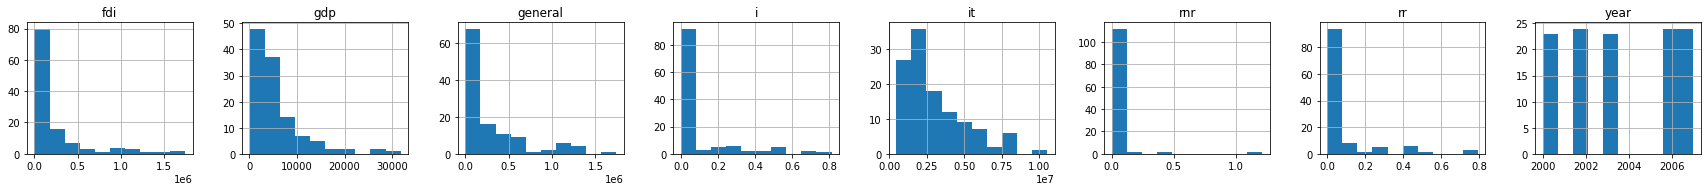

In [183]:
import pandas as pd
url = 'https://raw.githubusercontent.com/davidrkearney/Kearney_Data_Science/master/_notebooks/df_panel_fix.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

import pandas as pd
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split



df.columns

sklearn.set_config(display='diagram')

df=df.dropna()

df.isnull().sum()



X, y = df.drop(['specific', 'Unnamed: 0'], axis = 1), df['specific']

X


_ = X.hist(figsize=(30, 15), layout=(5, 8))

In [184]:
import numpy as np
import sklearn
sklearn.set_config(display='diagram')

## Categorical Data

### OridinalEncoder

In [185]:
from sklearn.preprocessing import OrdinalEncoder

In [186]:
ord_encoder = OrdinalEncoder()
ord_encoder.fit_transform(df)

array([[  0.,   0.,  17., ...,  24.,   0.,  28.],
       [  1.,   0.,  48., ...,  29.,   0.,  60.],
       [  2.,   0.,  64., ...,  40.,   0.,  67.],
       ...,
       [115.,  27.,  44., ...,  97.,   0.,  53.],
       [116.,  27.,  84., ...,   4.,   0.,  64.],
       [117.,  27.,  78., ...,  25.,   0.,  71.]])

In [187]:
ord_encoder.categories_

[array([  4,   6,   7,  10,  11,  16,  18,  19,  22,  23,  34,  35,  40,
         42,  43,  46,  47,  52,  54,  58,  64,  66,  67,  70,  71,  76,
         78,  79,  82,  83,  88,  90,  91,  94,  95, 107, 112, 119, 124,
        126, 127, 130, 131, 136, 138, 139, 142, 143, 148, 150, 151, 154,
        155, 160, 162, 163, 166, 167, 172, 174, 175, 178, 179, 184, 186,
        187, 190, 191, 196, 198, 199, 202, 203, 220, 222, 223, 226, 227,
        232, 234, 235, 239, 244, 246, 247, 250, 251, 258, 259, 262, 263,
        280, 282, 283, 292, 294, 295, 298, 310, 316, 318, 319, 322, 323,
        328, 330, 331, 334, 335, 340, 342, 343, 346, 347, 354, 355, 358,
        359]),
 array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
        'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
        'Hubei', 'Hunan', 'Jiangsu', 'Jiangxi', 'Jilin', 'Ningxia',
        'Qinghai', 'Shaanxi', 'Shandong', 'Shanxi', 'Sichuan', 'Tianjin',
        'Tibet', 'Xinjiang', 'Yunnan', 

In [188]:
ord_encoder.transform(df)

array([[  0.,   0.,  17., ...,  24.,   0.,  28.],
       [  1.,   0.,  48., ...,  29.,   0.,  60.],
       [  2.,   0.,  64., ...,  40.,   0.,  67.],
       ...,
       [115.,  27.,  44., ...,  97.,   0.,  53.],
       [116.,  27.,  84., ...,   4.,   0.,  64.],
       [117.,  27.,  78., ...,  25.,   0.,  71.]])

### Categories that are unknown during `fit`

### How to handle unknown categories in OridinalEncoder?

### Provide all the categories in the constructor

## OneHotEncoder

In [189]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
X_trans = ohe.fit_transform(df)
X_trans

<118x909 sparse matrix of type '<class 'numpy.float64'>'
	with 1534 stored elements in Compressed Sparse Row format>

In [190]:
X_trans.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Switch to dense

In [191]:
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(df)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Unknown categories during transform?

### OHE can handle unknowns

In [192]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe.fit(df)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [193]:
ohe.transform(df)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [194]:
ohe.categories_

[array([  4,   6,   7,  10,  11,  16,  18,  19,  22,  23,  34,  35,  40,
         42,  43,  46,  47,  52,  54,  58,  64,  66,  67,  70,  71,  76,
         78,  79,  82,  83,  88,  90,  91,  94,  95, 107, 112, 119, 124,
        126, 127, 130, 131, 136, 138, 139, 142, 143, 148, 150, 151, 154,
        155, 160, 162, 163, 166, 167, 172, 174, 175, 178, 179, 184, 186,
        187, 190, 191, 196, 198, 199, 202, 203, 220, 222, 223, 226, 227,
        232, 234, 235, 239, 244, 246, 247, 250, 251, 258, 259, 262, 263,
        280, 282, 283, 292, 294, 295, 298, 310, 316, 318, 319, 322, 323,
        328, 330, 331, 334, 335, 340, 342, 343, 346, 347, 354, 355, 358,
        359]),
 array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
        'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
        'Hubei', 'Hunan', 'Jiangsu', 'Jiangxi', 'Jilin', 'Ningxia',
        'Qinghai', 'Shaanxi', 'Shandong', 'Shanxi', 'Sichuan', 'Tianjin',
        'Tibet', 'Xinjiang', 'Yunnan', 

## Two categorical features

In [195]:
df_train = pd.DataFrame({
    "province": ["Zhejiang", "Beijing", "Shanghai"],
    "region": ["East China", "North China", "Southwest China"]
})

In [196]:
ohe.fit(df_train)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [197]:
ohe.categories_

[array(['Beijing', 'Shanghai', 'Zhejiang'], dtype=object),
 array(['East China', 'North China', 'Southwest China'], dtype=object)]

In [198]:
ohe.transform(df_train)

array([[0., 0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.]])

# Column Transformer!

## With OridinalEncoder

In [199]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [200]:
df

,Unnamed: 0,province,specific,general,year,gdp,fdi,rnr,rr,i,fr,reg,it
4,4,Anhui,195580.0,32100.0,2000,2902.09,31847,0.000000,0.000000,0.000000,1601508,East China,1499110
6,6,Anhui,434149.0,66529.0,2002,3519.72,38375,0.000000,0.000000,0.000000,1677840,East China,2404936
7,7,Anhui,619201.0,52108.0,2003,3923.11,36720,0.000000,0.000000,0.000000,1896479,East China,2815820
10,10,Anhui,1457872.0,279052.0,2006,6112.50,139354,0.000000,0.000000,0.324324,3434548,East China,5167300
11,11,Anhui,2213991.0,178705.0,2007,7360.92,299892,0.000000,0.000000,0.324324,4468640,East China,7040099
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,347,Yunnan,2482173.0,564400.0,2007,4772.52,39453,0.000000,0.000000,0.000000,4867146,Southwest China,6832541
354,354,Zhejiang,365437.0,321686.0,2002,8003.67,307610,0.000000,0.000000,0.000000,4958329,East China,1962633
355,355,Zhejiang,391292.0,260313.0,2003,9705.02,498055,1.214286,0.035714,0.035714,6217715,East China,2261631
358,358,Zhejiang,1017303.0,394795.0,2006,15718.47,888935,1.214286,0.035714,0.035714,11537149,East China,2553268


In [201]:
ct = ColumnTransformer([
    ('numerical', StandardScaler(), ['fdi', 'gdp']),
    ('categorical', OrdinalEncoder(), ['reg'])
])

ct.fit_transform(df)

array([[-0.54088554, -0.48498461,  0.        ],
       [-0.52313911, -0.37867596,  0.        ],
       [-0.52763824, -0.30924305,  0.        ],
       [-0.24862668,  0.06760246,  0.        ],
       [ 0.18779748,  0.28248491,  0.        ],
       [-0.16975183, -0.44030651,  1.        ],
       [-0.15861681, -0.24178957,  1.        ],
       [-0.0317657 , -0.12264395,  1.        ],
       [ 0.60997938,  0.41275831,  1.        ],
       [ 0.74965914,  0.71036505,  1.        ],
       [-0.43826722, -0.31197638,  5.        ],
       [-0.33241116, -0.1796306 ,  5.        ],
       [ 0.30550625, -0.33653668,  0.        ],
       [ 0.41600281, -0.21553212,  0.        ],
       [ 0.07908699, -0.12669573,  0.        ],
       [ 0.24802608,  0.3208564 ,  0.        ],
       [ 0.47641082,  0.60738699,  0.        ],
       [-0.61051202, -0.80327715,  3.        ],
       [-0.61082193, -0.77244122,  3.        ],
       [-0.61943145, -0.59251706,  3.        ],
       [ 2.43926479,  0.86431921,  4.   

## With OneHotEncoder

In [202]:
ct = ColumnTransformer([
    ('numerical', StandardScaler(), ['fdi', 'gdp']),
    ('categorical', OneHotEncoder(), ['reg'])
])

In [203]:
ct.fit_transform(df)

array([[-0.54088554, -0.48498461,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.52313911, -0.37867596,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.52763824, -0.30924305,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.24862668,  0.06760246,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.18779748,  0.28248491,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.16975183, -0.44030651,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.15861681, -0.24178957,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.0317657 , -0.12264395,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.60997938,  0.41275831

In [204]:
# df

In [205]:
y

4       195580.0
6       434149.0
7       619201.0
10     1457872.0
11     2213991.0
         ...    
347    2482173.0
354     365437.0
355     391292.0
358    1017303.0
359     844647.0
Name: specific, Length: 118, dtype: float64

In [206]:
X.head()

,province,general,year,gdp,fdi,rnr,rr,i,fr,reg,it
4,Anhui,32100.0,2000,2902.09,31847,0.0,0.0,0.000000,1601508,East China,1499110
6,Anhui,66529.0,2002,3519.72,38375,0.0,0.0,0.000000,1677840,East China,2404936
7,Anhui,52108.0,2003,3923.11,36720,0.0,0.0,0.000000,1896479,East China,2815820
10,Anhui,279052.0,2006,6112.50,139354,0.0,0.0,0.324324,3434548,East China,5167300
11,Anhui,178705.0,2007,7360.92,299892,0.0,0.0,0.324324,4468640,East China,7040099


### Are three categories already encoded in the dataset?

In [207]:
X.dtypes

province     object
general     float64
year          int64
gdp         float64
fdi           int64
rnr         float64
rr          float64
i           float64
fr           object
reg          object
it            int64
dtype: object

### Are there missing values in the dataset?

In [208]:
missing_values = pd.concat({"na_cnt": X.isna().sum(), "dtypes": X.dtypes}, axis='columns')
missing_values

,na_cnt,dtypes
province,0,object
general,0,float64
year,0,int64
gdp,0,float64
fdi,0,int64
rnr,0,float64
rr,0,float64
i,0,float64
fr,0,object
reg,0,object


### Split data into training and test set

In [209]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

## ColumnTransformer

In [210]:
missing_values

,na_cnt,dtypes
province,0,object
general,0,float64
year,0,int64
gdp,0,float64
fdi,0,int64
rnr,0,float64
rr,0,float64
i,0,float64
fr,0,object
reg,0,object


In [211]:
X

,province,general,year,gdp,fdi,rnr,rr,i,fr,reg,it
4,Anhui,32100.0,2000,2902.09,31847,0.000000,0.000000,0.000000,1601508,East China,1499110
6,Anhui,66529.0,2002,3519.72,38375,0.000000,0.000000,0.000000,1677840,East China,2404936
7,Anhui,52108.0,2003,3923.11,36720,0.000000,0.000000,0.000000,1896479,East China,2815820
10,Anhui,279052.0,2006,6112.50,139354,0.000000,0.000000,0.324324,3434548,East China,5167300
11,Anhui,178705.0,2007,7360.92,299892,0.000000,0.000000,0.324324,4468640,East China,7040099
...,...,...,...,...,...,...,...,...,...,...,...
347,Yunnan,564400.0,2007,4772.52,39453,0.000000,0.000000,0.000000,4867146,Southwest China,6832541
354,Zhejiang,321686.0,2002,8003.67,307610,0.000000,0.000000,0.000000,4958329,East China,1962633
355,Zhejiang,260313.0,2003,9705.02,498055,1.214286,0.035714,0.035714,6217715,East China,2261631
358,Zhejiang,394795.0,2006,15718.47,888935,1.214286,0.035714,0.035714,11537149,East China,2553268


### Numerical preprocessing

In [212]:
numerical_features = ['general', 'gdp', 'fdi', 'i', 'rr']

In [213]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_prep = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])

In [214]:
num_prep

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

#### Running only on numerical features 

In [215]:
num_trans = num_prep.fit_transform(X_train[numerical_features])
num_trans

array([[ 0.84445696, -0.23824571,  0.05133332, -0.46886997,  1.84019633],
       [ 0.24766853,  2.07395803,  1.57444985, -0.46886997, -0.43195321],
       [-0.72214407, -0.0446055 , -0.43939868, -0.46886997, -0.43195321],
       [-0.48856958, -0.11992158, -0.34379901, -0.46886997, -0.43195321],
       [ 0.85337791, -0.87758205, -0.54348651, -0.46886997, -0.43195321],
       [-0.62992082, -0.83196322, -0.62382665, -0.46886997,  0.17004293],
       [-0.83650183,  3.23074054,  4.28312405,  1.06326271, -0.43195321],
       [ 1.76828095, -0.19541419, -0.41644878, -0.46886997, -0.43195321],
       [ 1.78635605,  0.89747804,  0.79717537, -0.46886997,  3.97033652],
       [-0.01481382, -0.57518987, -0.60442312,  3.47737968, -0.43195321],
       [-0.33025804, -0.71766019, -0.62552372, -0.46886997, -0.43195321],
       [-0.75781248, -0.70583032, -0.54596728, -0.46886997, -0.43195321],
       [ 0.18859962, -0.10301925, -0.50475274, -0.46886997,  1.78339259],
       [ 3.61705142,  1.91072514,  0.2

In [216]:
num_trans.shape

(88, 5)

In [217]:
X

,province,general,year,gdp,fdi,rnr,rr,i,fr,reg,it
4,Anhui,32100.0,2000,2902.09,31847,0.000000,0.000000,0.000000,1601508,East China,1499110
6,Anhui,66529.0,2002,3519.72,38375,0.000000,0.000000,0.000000,1677840,East China,2404936
7,Anhui,52108.0,2003,3923.11,36720,0.000000,0.000000,0.000000,1896479,East China,2815820
10,Anhui,279052.0,2006,6112.50,139354,0.000000,0.000000,0.324324,3434548,East China,5167300
11,Anhui,178705.0,2007,7360.92,299892,0.000000,0.000000,0.324324,4468640,East China,7040099
...,...,...,...,...,...,...,...,...,...,...,...
347,Yunnan,564400.0,2007,4772.52,39453,0.000000,0.000000,0.000000,4867146,Southwest China,6832541
354,Zhejiang,321686.0,2002,8003.67,307610,0.000000,0.000000,0.000000,4958329,East China,1962633
355,Zhejiang,260313.0,2003,9705.02,498055,1.214286,0.035714,0.035714,6217715,East China,2261631
358,Zhejiang,394795.0,2006,15718.47,888935,1.214286,0.035714,0.035714,11537149,East China,2553268


### Categorical preprocessing

In [218]:
categorical_features = ['province', 'reg']

In [219]:
cat_prep = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='sk_missing')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [220]:
cat_prep

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='sk_missing', strategy='constant')),
                ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))])

#### Running only on the categorical features

In [221]:
cat_trans = cat_prep.fit_transform(X_train[categorical_features])
cat_trans

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [222]:
cat_trans.shape

(88, 33)

## ColumnTransformer!

In [223]:
ct = ColumnTransformer([
   ('numerical', num_prep, numerical_features),
   ('categorical', cat_prep, categorical_features)
])

In [224]:
ct

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['general', 'gdp', 'fdi', 'i', 'rr']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='sk_missing',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['province', 'reg'])])

In [225]:
X_trans = ct.fit_transform(X_train)

In [226]:
X_trans[:, :5]

array([[ 0.84445696, -0.23824571,  0.05133332, -0.46886997,  1.84019633],
       [ 0.24766853,  2.07395803,  1.57444985, -0.46886997, -0.43195321],
       [-0.72214407, -0.0446055 , -0.43939868, -0.46886997, -0.43195321],
       [-0.48856958, -0.11992158, -0.34379901, -0.46886997, -0.43195321],
       [ 0.85337791, -0.87758205, -0.54348651, -0.46886997, -0.43195321],
       [-0.62992082, -0.83196322, -0.62382665, -0.46886997,  0.17004293],
       [-0.83650183,  3.23074054,  4.28312405,  1.06326271, -0.43195321],
       [ 1.76828095, -0.19541419, -0.41644878, -0.46886997, -0.43195321],
       [ 1.78635605,  0.89747804,  0.79717537, -0.46886997,  3.97033652],
       [-0.01481382, -0.57518987, -0.60442312,  3.47737968, -0.43195321],
       [-0.33025804, -0.71766019, -0.62552372, -0.46886997, -0.43195321],
       [-0.75781248, -0.70583032, -0.54596728, -0.46886997, -0.43195321],
       [ 0.18859962, -0.10301925, -0.50475274, -0.46886997,  1.78339259],
       [ 3.61705142,  1.91072514,  0.2

In [227]:
X_trans[:, 5:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [228]:
X_trans.shape

(88, 38)

### Linear model

In [229]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [230]:
lin_reg = Pipeline([
    ('preprocess', ct),
    ('lin_reg', LinearRegression())
])
lin_reg

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['general', 'gdp', 'fdi', 'i',
                                                   'rr']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='sk_missing',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['province', 'reg'])])),
                ('lin_reg', LinearRegression())])

In [231]:
lin_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['general', 'gdp', 'fdi', 'i',
                                                   'rr']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='sk_missing',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['province', 'reg'])])),
                ('lin_reg', LinearRegression())])

In [233]:
lin_reg.score(X_train, y_train)

0.9195619190476331

## Random Forest

In [234]:
from sklearn.ensemble import RandomForestRegressor

In [235]:
rf = Pipeline([
    ('preprocess', ct),
    ('log_reg', RandomForestRegressor(random_state=42))
])
rf

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['general', 'gdp', 'fdi', 'i',
                                                   'rr']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='sk_missing',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['province', 'reg'])])),
                ('log_reg', RandomForestRegressor(random_state=42))])

In [236]:
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['general', 'gdp', 'fdi', 'i',
                                                   'rr']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='sk_missing',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['province', 'reg'])])),
                ('log_reg', RandomForestRegressor(random_state=42))])

In [237]:
rf.score(X_train, y_train)

0.9503718502648469